<a href="https://colab.research.google.com/github/ShaliniKumari6570/Fake-And-Real-News-Detection/blob/main/Emotion_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split



In [3]:
from google.colab import files
uploaded = files.upload()


Saving emotion_dataset_raw.csv to emotion_dataset_raw.csv


In [5]:
data = pd.read_csv("emotion_dataset_raw.csv")

print(data.head())

   Emotion                                               Text
0  neutral                                             Why ? 
1      joy    Sage Act upgrade on my to do list for tommorow.
2  sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3      joy   Such an eye ! The true hazel eye-and so brill...
4      joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...


In [8]:
data = data.rename(columns={"content": "Text", "sentiment": "Emotions"})

In [10]:
print(data.columns)


Index(['Emotion', 'Text'], dtype='object')


In [11]:
data = data[["Text", "Emotion"]]
print(data.head())

                                                Text  Emotion
0                                             Why ?   neutral
1    Sage Act upgrade on my to do list for tommorow.      joy
2  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...  sadness
3   Such an eye ! The true hazel eye-and so brill...      joy
4  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...      joy


In [13]:
texts = data["Text"].tolist()
labels = data["Emotion"].tolist()

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

In [14]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [15]:
data.isna().sum()

,0
Text,0
Emotion,0


In [16]:
data.shape

(34792, 2)

In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [ps.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [21]:
data['Text'] = data['Text'].apply(stemming)

In [22]:
sequences = tokenizer.texts_to_sequences(texts)
max_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_length)

In [23]:
sequences = tokenizer.texts_to_sequences(texts)

In [25]:
padded_sequences

array([[   0,    0,    0, ...,    0,    0,  120],
       [   0,    0,    0, ...,  820,    9, 4061],
       [   0,    0,    0, ..., 1157,    2,   89],
       ...,
       [   0,    0,    0, ..., 2612,   15,   55],
       [   0,    0,    0, ...,    7,  736,   11],
       [   0,    0,    0, ...,   30,    1,   34]], dtype=int32)

In [26]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

In [27]:
one_hot_labels = tf.keras.utils.to_categorical(labels)


In [28]:
one_hot_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [29]:
xtrain, xtest, ytrain, ytest = train_test_split(padded_sequences,
                                                one_hot_labels,
                                                test_size=0.2)

In [30]:
one_hot_labels[0]

array([0., 0., 0., 0., 1., 0., 0., 0.])

In [31]:
from tensorflow.keras.layers import LSTM, Dropout

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_length))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dense(len(one_hot_labels[0]), activation="softmax"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(xtrain, ytrain, epochs=10, batch_size=32, validation_data=(xtest, ytest))


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


870/870 ━━━━━━━━━━━━━━━━━━━━ 198s 223ms/step - accuracy: 0.3838 - loss: 1.6214 - val_accuracy: 0.6063 - val_loss: 1.1245
Epoch 2/10
870/870 ━━━━━━━━━━━━━━━━━━━━ 195s 215ms/step - accuracy: 0.7144 - loss: 0.8643 - val_accuracy: 0.6372 - val_loss: 1.0671
Epoch 3/10
870/870 ━━━━━━━━━━━━━━━━━━━━ 203s 217ms/step - accuracy: 0.8328 - loss: 0.5333 - val_accuracy: 0.6206 - val_loss: 1.1819
Epoch 4/10
870/870 ━━━━━━━━━━━━━━━━━━━━ 207s 223ms/step - accuracy: 0.8867 - loss: 0.3684 - val_accuracy: 0.6242 - val_loss: 1.2933
Epoch 5/10
870/870 ━━━━━━━━━━━━━━━━━━━━ 190s 218ms/step - accuracy: 0.9134 - loss: 0.2752 - val_accuracy: 0.6280 - val_loss: 1.4253
Epoch 6/10
870/870 ━━━━━━━━━━━━━━━━━━━━ 202s 218ms/step - accuracy: 0.9342 - loss: 0.2168 - val_accuracy: 0.6163 - val_loss: 1.6195
Epoch 7/10
870/870 ━━━━━━━━━━━━━━━━━━━━ 214s 232ms/step - accuracy: 0.9477 - loss: 0.1732 - val_accuracy: 0.6242 - val_loss: 1.7232
Epoch 8/10
870/870 ━━━━━━━━━━━━━━━━━━━━ 194s 222ms/step - accuracy: 0.9599 - loss: 0.13

218/218 ━━━━━━━━━━━━━━━━━━━━ 24s 106ms/step
Test Accuracy: 0.6122


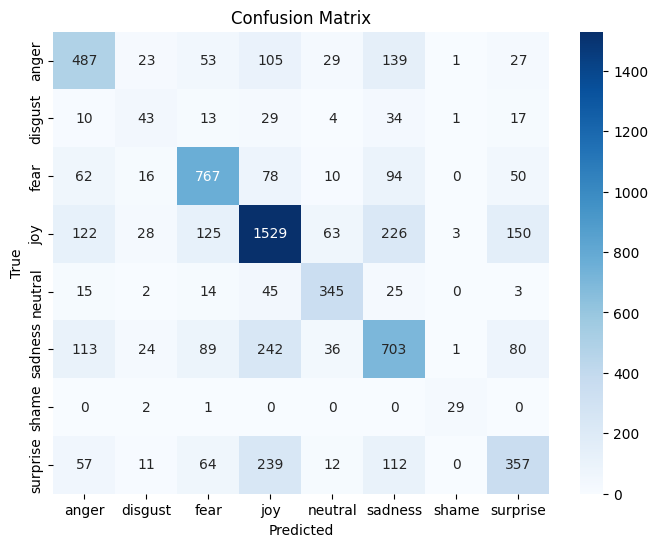

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on test set
y_pred_probs = model.predict(xtest)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(ytest, axis=1)

# Accuracy score
acc = accuracy_score(y_true, y_pred)
print(f"Test Accuracy: {acc:.4f}")

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [33]:
input_text = "hy is the internet not working again?! I’m fed up with your behavior!This service is absolutely terrible.I can't believe they treated me like that.Stop ignoring my messages!"



# Preprocess the input text
input_sequence = tokenizer.texts_to_sequences([input_text])
padded_input_sequence = pad_sequences(input_sequence, maxlen=max_length)
prediction = model.predict(padded_input_sequence)
predicted_label = label_encoder.inverse_transform([np.argmax(prediction[0])])
print(predicted_label[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
anger


In [35]:
sample_texts = [
    "I feel so alone right now.",
    "What a beautiful sunny day!",
    "I’m fed up with your behavior!",
    "I had toast for breakfast."
]

# Tokenize and pad (assuming tokenizer and max_len are already defined)
sample_seq = tokenizer.texts_to_sequences(sample_texts)
sample_pad = pad_sequences(sample_seq, maxlen=max_length)

# Predict
predictions = model.predict(sample_pad)

# Decode emotions
predicted_emotions = label_encoder.inverse_transform(np.argmax(predictions, axis=1))
for text, emotion in zip(sample_texts, predicted_emotions):
    print(f"Text: {text}\nPredicted Emotion: {emotion}\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Text: I feel so alone right now.
Predicted Emotion: joy

Text: What a beautiful sunny day!
Predicted Emotion: joy

Text: I’m fed up with your behavior!
Predicted Emotion: disgust

Text: I had toast for breakfast.
Predicted Emotion: joy

